In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline
sns.set()


In [18]:
parks = pd.read_csv("parks.csv")
species = pd.read_csv("species.csv")
species.head()

/home/sijariya/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


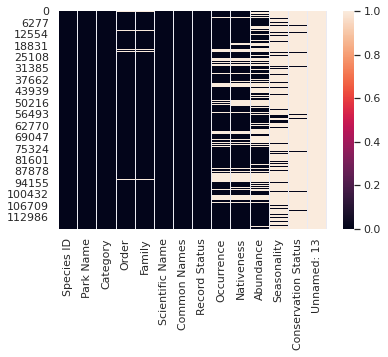

In [19]:

sns.heatmap(species.isnull())


In [20]:
df = pd.crosstab(species['Category'], species['Conservation Status'])
df 

Conservation Status,Breeder,Endangered,Extinct,In Recovery,Migratory,Proposed Endangered,Proposed Threatened,Resident,Species of Concern,Threatened,Under Review
Category,,,,,,,,,,,
Amphibian,0,5,0,0,0,0,0,0,61,8,26
Bird,4,64,0,65,0,2,0,4,2371,51,70
Crab/Lobster/Shrimp,0,1,0,0,0,0,0,0,0,0,1
Fish,1,33,1,0,0,0,0,0,66,40,10
Fungi,0,1,0,0,0,0,0,0,2,0,1
Insect,0,17,0,0,0,1,0,0,107,4,12
Invertebrate,0,9,0,0,0,0,0,0,1,7,4
Mammal,1,93,0,9,2,0,3,0,552,19,1
Nonvascular Plant,0,0,0,0,0,0,0,0,27,0,4


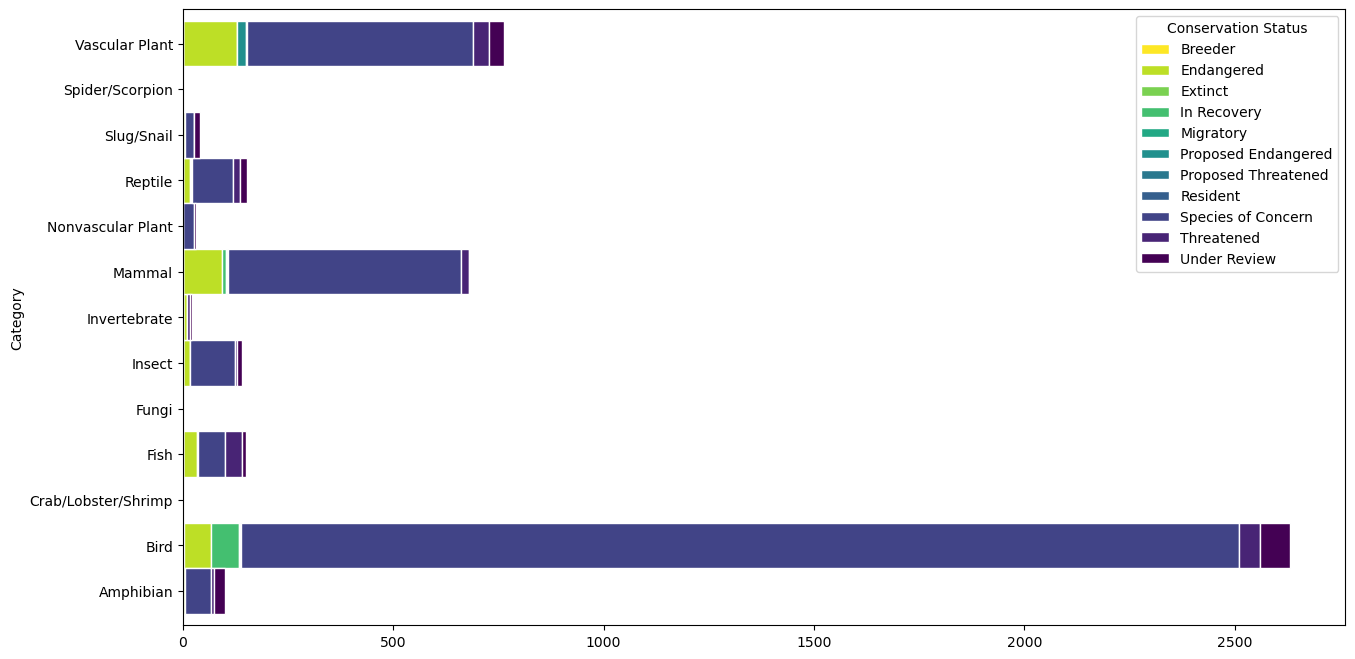

In [21]:
style.use('default')
df.plot.barh(stacked=True, figsize=[15,8],
             edgecolor='white',
             width=1, 
             colormap='viridis_r')

In [22]:

mammal = species[species['Category']=='Mammal']
mammal_df = pd.crosstab(mammal['Order'], mammal['Conservation Status'], margins=True)
mammal_df.head()


Conservation Status,Breeder,Endangered,In Recovery,Migratory,Proposed Threatened,Species of Concern,Threatened,Under Review,All
Order,,,,,,,,,
Artiodactyla,0,2,0,1,0,25,1,1,30
Carnivora,0,37,7,1,3,105,7,0,160
Cetacea,0,38,2,0,0,0,0,0,40
Chiroptera,0,11,0,0,0,399,10,0,420
Lagomorpha,0,0,0,0,0,5,0,0,5


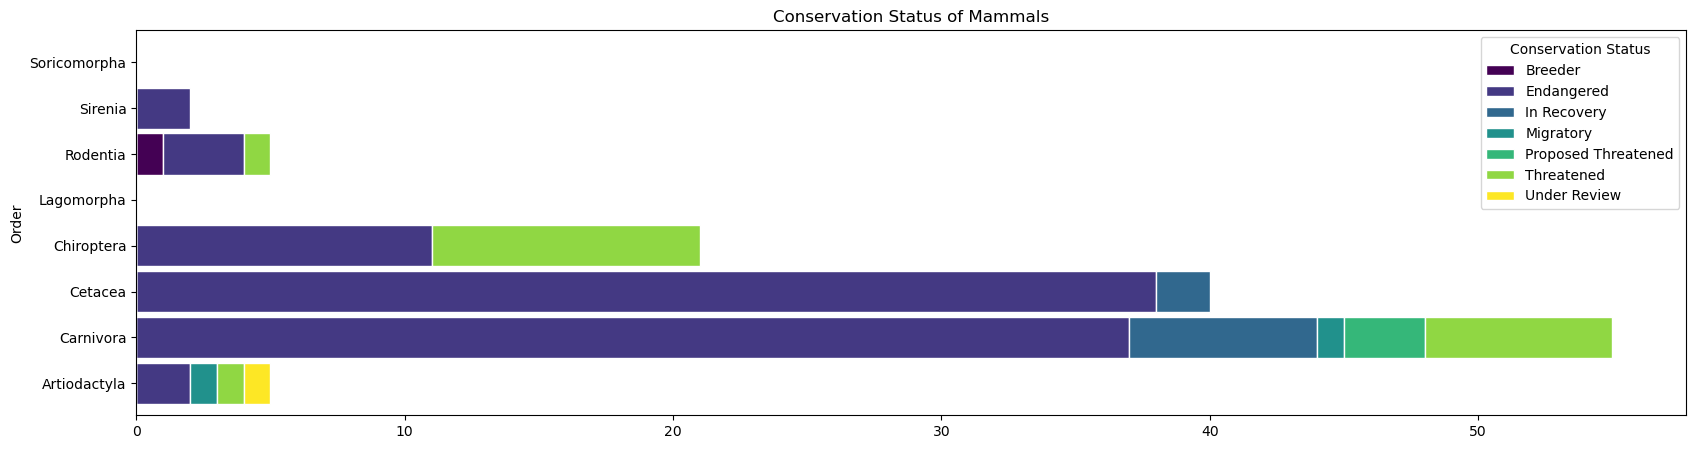

In [23]:
mammal_df = mammal_df.drop(['All', 'Species of Concern'], axis=1)
mammal_df = mammal_df.drop(['All'], axis=0)

style.use('default')
mammal_df.plot.barh(stacked=True, 
                    figsize=[20,5], 
                    colormap='viridis', 
                    edgecolor='white', 
                    width=0.9,
                    title='Conservation Status of Mammals')


In [24]:
carn = mammal[mammal['Order']=='Carnivora']
ceta = mammal[mammal['Order']=='Cetacea']
arti = mammal[mammal['Order']=='Artiodactyla']
chir = mammal[mammal['Order']=='Chiroptera']

carn = carn[carn['Conservation Status']=='Endangered']
ceta = ceta[ceta['Conservation Status']=='Endangered']
arti = arti[arti['Conservation Status']=='Endangered']
chir = chir[chir['Conservation Status']=='Endangered']

carn = pd.crosstab(carn['Family'], carn['Conservation Status'], margins=True)
ceta = pd.crosstab(ceta['Family'], ceta['Conservation Status'], margins=True)
arti = pd.crosstab(arti['Family'], arti['Conservation Status'], margins=True)
chir = pd.crosstab(chir['Family'], chir['Conservation Status'], margins=True)

carn = carn.drop(['All'],axis=1)
carn = carn.drop(['All'], axis=0)
carn = carn.reset_index()
carn['specie'] = 'Carnivora'

ceta = ceta.drop(['All'],axis=1)
ceta = ceta.drop(['All'], axis=0)
ceta = ceta.reset_index()
ceta['specie'] = 'Cetacean'

arti = arti.drop(['All'],axis=1)
arti = arti.drop(['All'], axis=0)
arti = arti.reset_index()
arti['specie'] = 'Artiodactyla'

chir = chir.drop(['All'],axis=1)
chir = chir.drop(['All'], axis=0)
chir = chir.reset_index()
chir['specie'] = 'Chiroptera'

In [25]:
df_specie = pd.concat([ceta, carn, arti, chir],axis=0)

df_specie = pd.DataFrame(pd.concat([df_specie['Family'],
                       df_specie['Endangered'],
                       df_specie['specie']], axis=1))
df_specie


,Family,Endangered,specie
0,Balaenidae,2,Cetacean
1,Balaenopteridae,23,Cetacean
2,Eschrichtiidae,4,Cetacean
3,Monodontidae,4,Cetacean
4,Physeteridae,5,Cetacean
0,Canidae,22,Carnivora
1,Felidae,4,Carnivora
2,Mustelidae,6,Carnivora
3,Otariidae,3,Carnivora
4,Phocidae,2,Carnivora


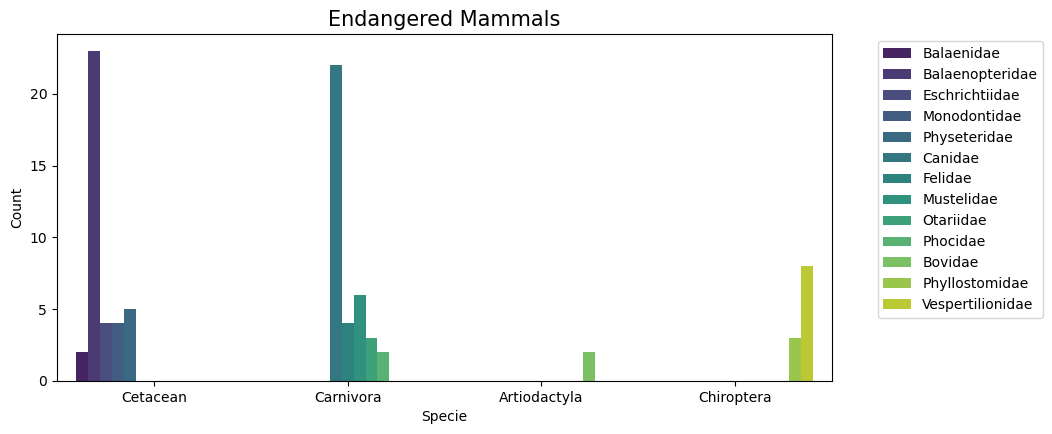

In [26]:
style.use('default')
plt.figure(figsize=[10,4.5])
sns.barplot(x = df_specie['specie'], 
            y = df_specie['Endangered'], 
            hue=df_specie['Family'],
            palette='viridis',
           dodge=True,
           edgecolor='None')
plt.xlabel('Specie')
plt.ylabel('Count')
plt.title('Endangered Mammals', fontsize=15)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [27]:
new_df = species[species['Category']=='Mammal']
new_df = new_df[['Category','Family','Abundance','Nativeness', 'Occurrence', 'Seasonality']]


df_ab = pd.crosstab(new_df['Family'],
           new_df['Abundance'])

df_nat = pd.crosstab(new_df['Family'],
           new_df['Nativeness'])

df_occ = pd.crosstab(new_df['Family'],
           new_df['Occurrence'])

df_seo = pd.crosstab(new_df['Family'],
           new_df['Seasonality'])

df_add = pd.concat([df_ab, df, df_nat, df_occ, df_seo], axis=1)
df_add


,Abundant,Common,Native,Occasional,Rare,Uncommon,Unknown,Breeder,Endangered,Extinct,...,"Breeder, Migratory","Breeder, Resident",Migratory,"Migratory, Summer","Migratory, Winter",Rare,Resident,Summer,Unknown,Vagrant
Antilocapridae,0.0,5.0,0.0,1.0,1.0,2.0,6.0,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0
Aplodontiidae,0.0,2.0,0.0,1.0,1.0,3.0,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Balaenidae,0.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Balaenopteridae,0.0,2.0,0.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,...,0.0,0.0,14.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Bovidae,6.0,16.0,0.0,4.0,7.0,12.0,14.0,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Slug/Snail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spider/Scorpion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vascular Plant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,128.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Odobenidae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


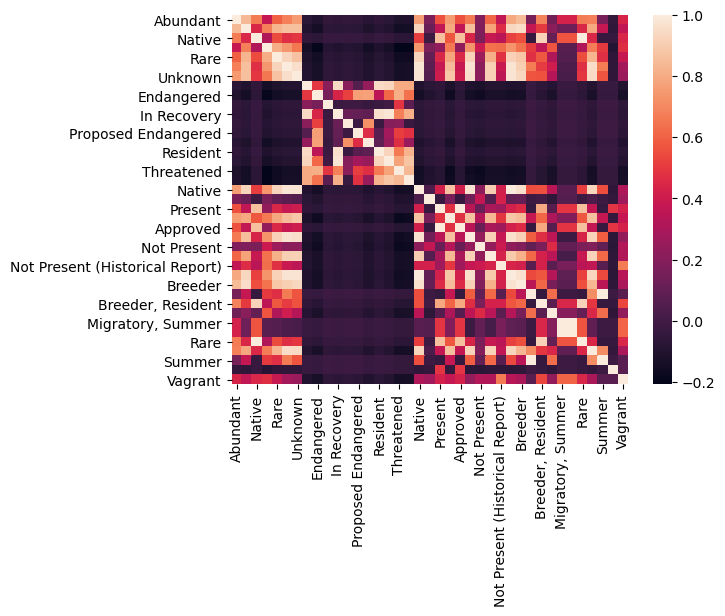

In [28]:
df_add.fillna(0, inplace=True)

sns.heatmap(df_add.corr())